# Programming for Data Science and Artificial Intelligence

## 15 Extending Deep Neural Network

### Readings

- [WEIDMAN] Ch4
- [CHARU] Ch2-3



In the last two classes, we focus on understanding deep neural net and I hope it's going fantastic.  Anyhow, what we have been discovering so far is the most basic form of it and most of the time, it is insufficient for most real-world problems.  

Today, we shall explore some well-understood techniques that make neural network training more likely to succeed.

Before doing that, let's review the intuition behind neural network:

In a high-level view, we can say that Neural Network is trying to most optimal parameters which is commonly defined as W that **minimizes the loss**, which can be described using the figure like this:

<img src="figures/4-1.png" style="width: 300px;"/>


Now, if we use non-linear activation function like sigmoid, **each W will have a non-linear relationship with the loss**.  If we plot one W against loss, while keeping everything constant, we get this oversimplistic graph:

<img src="figures/4-2.png" style="width: 300px;"/>

At the beginning, we will probably randomize a W value, and **we iterate to update our W by finding the gradients**.  How large should we move along the slope then?  We use **learning rate**.  Small learning rate means small step of update which can be slow but risk ending up in a **local minimia**, while large learning mean large step of update what will be faster but risk **hopping over"** the global minimum

<img src="figures/4-3.png" style="width: 300px;"/>

Now we can imagine there are many areas we can perhaps improve on:

1.  The **loss function**.  We used MSE as our loss function.  We chose this because it is convex (i.e., imagining a shape of U), meaning that when the loss is huge, the gradient is steeper (imagine the curve is very steep on the top of U but become less toward the bottom of U), allowing the model to quickly improve.  The good question we can ask here is **whether we can find a loss function that is steeper** and also is differentiable so gradient can be easily find, in order to accelerate the learning.

2. The **activation function**.  We used sigmoid as our activation function, but the gradient of sigmoid, *at best*, can have derivative of 0.25 which is quite small.   The good question we can ask here is **whether we can find a activation function that can provide larger range of derivative** and thus can accelerate the learning.

3. The **update rule**.  Now we only simply multiply the learning rate with the current gradient.  However, our batch X and y keeps changing.  It may be nice if we can update the params based on histories of gradients, not only on the current gradient.

4. The **learning rate**.  Currently, we put a static learning rate, but it does not make so much sense.  In fact, it can be safely assumed that our randomized weight is greatly far from the optimal weight and thus learning rate should be large.  However, as iterations run, learning rate should be slowly reduce so we do not keep hopping over and over again, not finding the minimum.

5. The **weight initialization** We currently simply randomize our Ws but the good question is whether we can improve this process a bit.

6. Last, the **overfitting**.  You may already realize that we so far is hesistant to add more layers.  Why?  Because more layers though may be more accurate but could potentially overfit.  Thus, we need to add some mechanisms to counter the act of adding more layers, in order to prevent overfitting.

Phew....they may look a lot but that's the point of the beauty of deep neural net.  Let's start with the loss function.

### 1. Softmax Cross Entropy Function

So recall the question whether we can find **a loss function that is steeper**.

Indeed, if we consider a **classification problem**, **softmax cross entropy** as a loss function has a steeper gradients, exploiting the fact that we know the predicted results are probabilities that sum up to 1

The **Softmax Cross Entropy** function has two components: (1) softmax function, and (2) cross entropy function.

Let's first focus on the softmax function:

#### The Softmax Function

For example, let's have a classification problem with N classes, let's say 3 classes.  Then for sample 1, the predicted values can be written as:

Vector of probabilities for sample 1 = <code> [5, 3, 2] </code>

5, 3, 2 represent the regressed probabilities of each class.  For example, 5 represent the probability of sample 1 to belong to class 1, 3 for class 2, and 2 for class 3.   

To make it more clear, it is desirable to convert <code> [5, 3, 2] </code> to something like <code> [0.5, 0.3, 0.2] </code> so they sum up to 1 and are really probabilities. 

Indeed, this can be easily done by simply normalizing them like this:

$$ \text{Normalize}(\begin{bmatrix} x_1 \\ x_2 \\ x_3 \end{bmatrix})  = \begin{bmatrix} \frac{x_1}{x_1 + x_2 + x_3} \\ 
\frac{x_2}{x_1 + x_2 + x_3} \\
\frac{x_3}{x_1 + x_2 + x_3}
\end{bmatrix} $$

However, there turns out a way that both produces **steeper** gradients, and at the same time, **has elegant mathematical properties**.  This is called **softmax function** like this:

$$ \text{Softmax}(\begin{bmatrix} x_1 \\ x_2 \\ x_3 \end{bmatrix})  = \begin{bmatrix} \frac{e^{x_1}}{e^{x_1} + e^{x_2} + e^{x_3}} \\ 
\frac{e^{x_2}}{e^{x_1} + e^{x_2} + e^{x_3}} \\
\frac{e^{x_3}}{e^{x_1} + e^{x_2} + e^{x_3}}
\end{bmatrix} $$

The good properties include:
1. The softmax function makes the bigger value much bigger, forcing the neural network to be "less neutral".  This is doable since we are most interested in the class with biggest probability anyway.  If we apply <code>softmax([5, 3, 2])</code>, we get <code>[0.84, 0.11, 0.04]</code> which is different with the more neutral method of normalization which get <code>[0.5, 0.3, 0.2]</code>

2. The softmax function has a steeper gradients, comparing to simple normalization, since derivative of $e^x$ is $e^x$!

#### Cross Entropy Loss

Recall that loss function in classification problems take a vector of predicted probabilities 

$$ \begin{bmatrix} p_1 \\ . \\ . \\ p_n \end{bmatrix} $$

For N=3, we can have like this <code>[0.84, 0.11, 0.04]</code>

The loss function will then calculate the loss based on the differences between this vector of predicted probabilities and a vector of actual values that look like this:

$$ \begin{bmatrix} y_1 \\ . \\ . \\ y_n \end{bmatrix} $$

If sample 1 belongs to class 1, then this vector will look like this: <code>[1, 0, 0]</code>

The cross entropy loss function, for each index $i$ in these vectors, is 

$$ \text{CE}(p_i, y_i) = - y_i * \text{log}(p_i) - (1 - y_i) * \text{log}(1-p_i) $$

Why this loss function make sense?  Here is the breakdown situation when $y_i = 0$ and $y_i = 1$

$$
CE(p,y_i)=
\begin{cases}
-log(1-p_i) & \text{if }  y_i = 0\\
-log(p_i) & \text{if }  y_i = 1
\end{cases}
$$

If our $y_i = 0$, 

- When our $p_i$ is near 0 which means we are correct, the loss become 

$$-log(1) = 0$$

- otherwise, if our $p_i$ is near 1 which means we are incorrect, the loss becomes 

$$-log(0) = \infty$$

If our $y_i = 1$

- When our $p_i$ is near 0 which means we are incorrect, the loss become 

$$-log(0) = \infty$$

- otherwise, if our $p_i$ is near 1 which means we are correct, the loss becomes 

$$-log(1) = 0$$

If we were to plot the situation when $y_i = 0$, here is the plot:

Text(0, 0.5, 'Loss values')

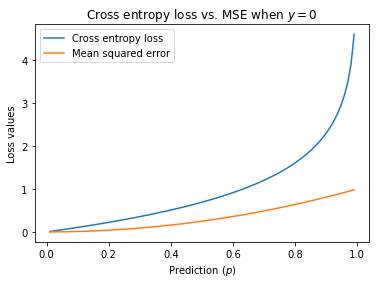

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0.01, 0.99, 99)  #range of p
y1 = -1.0 * np.log(1 - x)  #the cross entropy
y2 = (x - 0) ** 2  #the MSE
plt.plot(x, y1);
plt.plot(x, y2);
plt.legend(['Cross entropy loss', 'Mean squared error'])

plt.title("Cross entropy loss vs. MSE when $y = 0$")
plt.xlabel("Prediction ($p$)")
plt.ylabel("Loss values")

You can clearly see that **cross entrophy** has a steeper gradient when the prediction is very far from the actual values

Similarly, we can plot when $y_i = 1$

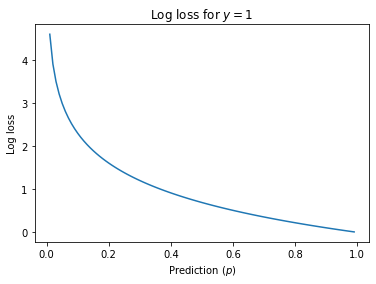

In [2]:
x = np.linspace(0.01, 0.99, 99)
y = -1.0 * np.log((x))

plt.plot(x, y);
plt.title("Log loss for $y = 1$")
plt.xlabel("Prediction ($p$)")
plt.ylabel("Log loss");

The real magic happens when we combine this loss with the softmax function like this:

$$ {SCE}_1 = - y_1 * log(\frac{e^{x_1}}{e^{x_1} + e^{x_2} + e^{x_3}}) - (1 - y_1) * log(1-\frac{e^{x_1}}{e^{x_1} + e^{x_2} + e^{x_3}}) $$

This **softmax cross entropy** function first converts $x_1...x_n$ into probabilities, and then insert these probabilities into the cross entrophy function.

It turns out that the gradient can also be very easily calculated as follows:

$$\frac{\partial SCE_1}{\partial x_1} = \frac{e^{x_1}}{e^{x_1} + e^{x_2} + e^{x_3}} - y_1$$

That means that the total gradient is as follows:

$$ \text{softmax}(\begin{bmatrix} p_1 \\ p_2 \\ p_3 \end{bmatrix}) - \begin{bmatrix} y_1 \\ y_2 \\ y_3 \end{bmatrix} $$

Enough talk.  Let's code this up.

To make this simple, I have stored all our stuff that we have develop so far in the folder <code>/neuralnet/first_version.py</code>

In [3]:
from neuralnet.first_version import Loss
from numpy import ndarray

class SoftmaxCrossEntropy(Loss):
    def __init__(self, eps: float=1e-9):
        super().__init__()
        self.eps = eps
        self.single_output = False

    def _output(self) -> float:
        
        # applying the softmax function to each row (observation)
        softmax_preds = softmax(self.prediction, axis=1)

        # clipping the softmax output to prevent numeric instability
        self.softmax_preds = np.clip(softmax_preds, self.eps, 1 - self.eps)

        # actual loss computation
        softmax_cross_entropy_loss = (
            -1.0 * self.target * np.log(self.softmax_preds) - \
                (1.0 - self.target) * np.log(1 - self.softmax_preds)
        )
        
        #return average loss
        return np.sum(softmax_cross_entropy_loss) / self.prediction.shape[0]

    def _input_grad(self) -> ndarray:
        
        #return average grad
        return (self.softmax_preds - self.target) / self.prediction.shape[0]

### 2. Activation Function
